In [138]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt

import seaborn as sns

import optuna

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, RocCurveDisplay, roc_auc_score, roc_curve

import warnings

import os

In [139]:
warnings.filterwarnings("ignore")

In [140]:
CHECK_METRICS_CLASSIFICATION_PATH = os.path.abspath(os.path.join(os.getcwd(), '../../utils/check_metrics_classification.py'))

IMPORT_LIST_PATHS = [CHECK_METRICS_CLASSIFICATION_PATH]

for path in IMPORT_LIST_PATHS:
  with open(path) as file:
      exec(file.read())

In [141]:
df = pd.read_csv('Wine_TRAIN')
df.columns = range(len(df.iloc[0]))

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Columns: 235 entries, 0 to 234
dtypes: float64(234), int64(1)
memory usage: 102.9 KB


In [142]:
df

,0,1,2,3,4,5,6,7,8,9,...,225,226,227,228,229,230,231,232,233,234
0,1,1.7797,1.6389,1.5120,1.3920,1.2778,1.1704,1.06670,0.96700,0.87141,...,-1.6706,-1.7104,-1.7458,-1.7834,-1.8110,-1.8377,-1.8613,-1.8808,-1.9016,-1.9193
1,1,1.7765,1.6363,1.5083,1.3885,1.2755,1.1666,1.06350,0.96505,0.86839,...,-1.6739,-1.7139,-1.7488,-1.7865,-1.8142,-1.8409,-1.8645,-1.8841,-1.9045,-1.9226
2,1,1.7741,1.6351,1.5079,1.3887,1.2772,1.1716,1.06680,0.96652,0.87209,...,-1.6563,-1.6954,-1.7309,-1.7691,-1.7966,-1.8231,-1.8465,-1.8658,-1.8869,-1.9049
3,1,1.7765,1.6377,1.5109,1.3923,1.2791,1.1726,1.06920,0.97037,0.87466,...,-1.6552,-1.6947,-1.7302,-1.7684,-1.7958,-1.8219,-1.8448,-1.8646,-1.8857,-1.9037
4,1,1.7769,1.6366,1.5106,1.3923,1.2802,1.1735,1.07080,0.97174,0.87535,...,-1.6519,-1.6913,-1.7263,-1.7640,-1.7913,-1.8182,-1.8411,-1.8603,-1.8814,-1.8993
5,1,1.6584,1.5238,1.4031,1.2931,1.1898,1.0909,0.99478,0.90221,0.81188,...,-1.6567,-1.6938,-1.7287,-1.7662,-1.7917,-1.8176,-1.8391,-1.8583,-1.8789,-1.8950
6,1,1.6565,1.5245,1.4049,1.2939,1.1896,1.0898,0.99356,0.90179,0.81226,...,-1.6583,-1.6959,-1.7308,-1.7680,-1.7935,-1.8194,-1.8409,-1.8602,-1.8803,-1.8964
7,1,1.6603,1.5274,1.4062,1.2940,1.1902,1.0914,0.99570,0.90357,0.81369,...,-1.6567,-1.6943,-1.7287,-1.7667,-1.7922,-1.8177,-1.8392,-1.8580,-1.8790,-1.8955
8,1,1.7161,1.5791,1.4556,1.3401,1.2323,1.1290,1.03020,0.93495,0.84108,...,-1.6600,-1.6986,-1.7336,-1.7713,-1.7979,-1.8239,-1.8464,-1.8657,-1.8859,-1.9030
9,1,1.7180,1.5787,1.4543,1.3393,1.2319,1.1291,1.02850,0.93277,0.83979,...,-1.6596,-1.6987,-1.7332,-1.7710,-1.7979,-1.8240,-1.8464,-1.8658,-1.8860,-1.9030


In [143]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000
1,1.7797,1.7765,1.7741,1.7765,1.7769,1.6584,1.6565,1.6603,1.7161,1.7180,...,1.6703,1.6828,1.6779,1.6761,1.6630,1.6666,1.6656,1.6833,1.6876,1.6902
2,1.6389,1.6363,1.6351,1.6377,1.6366,1.5238,1.5245,1.5274,1.5791,1.5787,...,1.5368,1.5500,1.5449,1.5426,1.5275,1.5302,1.5314,1.5499,1.5499,1.5539
3,1.5120,1.5083,1.5079,1.5109,1.5106,1.4031,1.4049,1.4062,1.4556,1.4543,...,1.4174,1.4292,1.4242,1.4220,1.4063,1.4081,1.4093,1.4276,1.4278,1.4365
4,1.3920,1.3885,1.3887,1.3923,1.3923,1.2931,1.2939,1.2940,1.3401,1.3393,...,1.3043,1.3163,1.3133,1.3116,1.2935,1.2958,1.2961,1.3135,1.3161,1.3245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-1.8377,-1.8409,-1.8231,-1.8219,-1.8182,-1.8176,-1.8194,-1.8177,-1.8239,-1.8240,...,-1.8092,-1.7974,-1.7950,-1.8011,-1.8178,-1.8188,-1.8182,-1.8180,-1.8217,-1.8274
231,-1.8613,-1.8645,-1.8465,-1.8448,-1.8411,-1.8391,-1.8409,-1.8392,-1.8464,-1.8464,...,-1.8310,-1.8191,-1.8171,-1.8228,-1.8402,-1.8403,-1.8401,-1.8404,-1.8442,-1.8490
232,-1.8808,-1.8841,-1.8658,-1.8646,-1.8603,-1.8583,-1.8602,-1.8580,-1.8657,-1.8658,...,-1.8497,-1.8377,-1.8356,-1.8414,-1.8590,-1.8586,-1.8585,-1.8588,-1.8626,-1.8674
233,-1.9016,-1.9045,-1.8869,-1.8857,-1.8814,-1.8789,-1.8803,-1.8790,-1.8859,-1.8860,...,-1.8698,-1.8580,-1.8555,-1.8614,-1.8787,-1.8787,-1.8786,-1.8794,-1.8832,-1.8886


Видно, что датасет не обладает сильным разнообразием

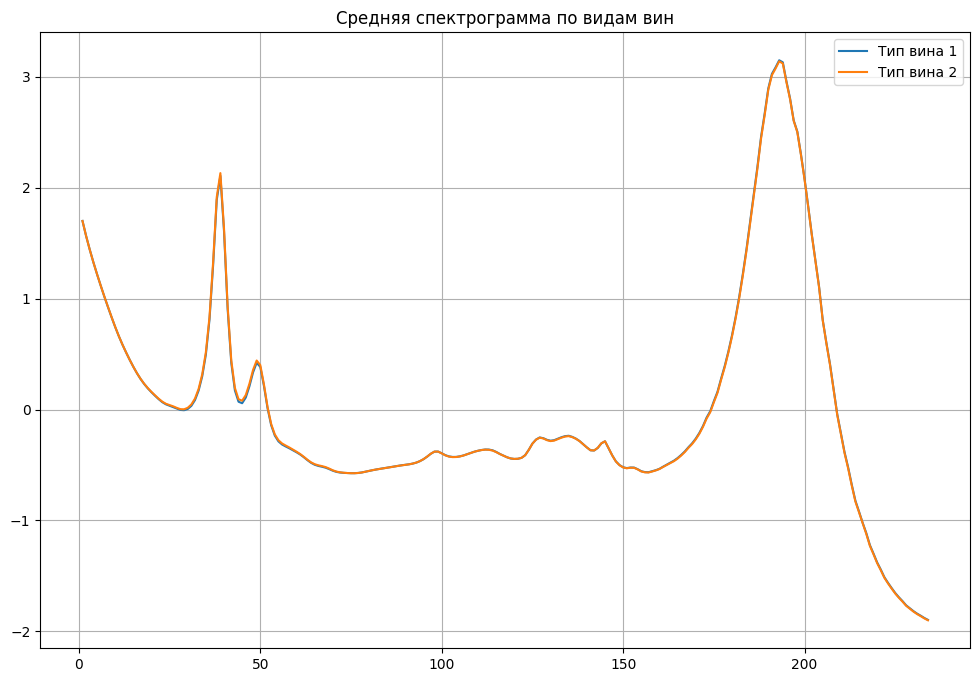

In [163]:
df_grouped = df.groupby(0)

plt.figure(figsize=(12, 8))
for wine_type, group in df_grouped:
    mean_spectrum = group.drop(columns=0).mean()
    plt.plot(mean_spectrum, label=f'Тип вина {wine_type}')

plt.title('Средняя спектрограмма по видам вин')

plt.legend()
plt.grid(True)
plt.show()

Баланс сильно не нарушен - ок

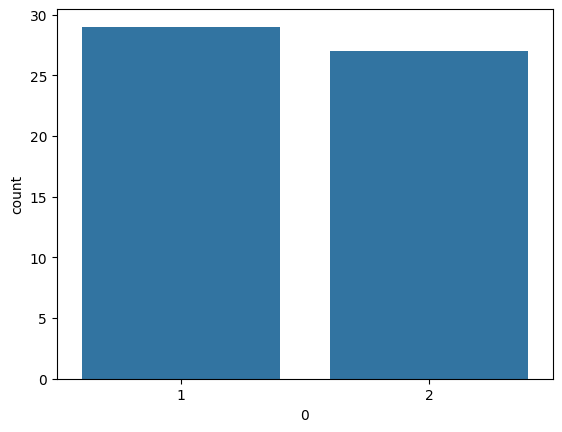

In [144]:
sns.barplot(df.iloc[:,0].value_counts())
plt.show()

In [145]:
def split_df(df):
  return df.iloc[:,1:], df.iloc[:,0]

In [146]:
X, y = split_df(df)

X, y

(       1       2       3       4       5       6        7        8        9    \
 0   1.7797  1.6389  1.5120  1.3920  1.2778  1.1704  1.06670  0.96700  0.87141   
 1   1.7765  1.6363  1.5083  1.3885  1.2755  1.1666  1.06350  0.96505  0.86839   
 2   1.7741  1.6351  1.5079  1.3887  1.2772  1.1716  1.06680  0.96652  0.87209   
 3   1.7765  1.6377  1.5109  1.3923  1.2791  1.1726  1.06920  0.97037  0.87466   
 4   1.7769  1.6366  1.5106  1.3923  1.2802  1.1735  1.07080  0.97174  0.87535   
 5   1.6584  1.5238  1.4031  1.2931  1.1898  1.0909  0.99478  0.90221  0.81188   
 6   1.6565  1.5245  1.4049  1.2939  1.1896  1.0898  0.99356  0.90179  0.81226   
 7   1.6603  1.5274  1.4062  1.2940  1.1902  1.0914  0.99570  0.90357  0.81369   
 8   1.7161  1.5791  1.4556  1.3401  1.2323  1.1290  1.03020  0.93495  0.84108   
 9   1.7180  1.5787  1.4543  1.3393  1.2319  1.1291  1.02850  0.93277  0.83979   
 10  1.7151  1.5795  1.4556  1.3393  1.2307  1.1279  1.02960  0.93353  0.84015   
 11  1.7017  1.5

In [147]:
df_test = pd.read_csv('Wine_TEST')
X_test, y_test = split_df(df_test)

In [148]:
ENUM_MODEL_LIST = {
    'rfc': RandomForestClassifier,
    'logistic_regression': LogisticRegression
}

ENUM_MODEL_PARAMS = {
    'rfc': {
      'n_estimators': 800, 
      'max_depth': 50, 
      'min_samples_split': 5, 
      'min_samples_leaf': 1,
     },
    'logistic_regression': {
      'penalty': 'l2', 
      'C': 9.820546322168331
    }
}

In [149]:
def getModelParamsSuggestion(trial, model):
  params = {}

  match model:
    case 'rfc':
      params = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
      'max_depth': trial.suggest_int('max_depth', 2, 50),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 30),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 30),
      }
    case 'logistic_regression':
      params = {
        'multi_class': 'multinomial',
        'solver':'lbfgs',
        'penalty': trial.suggest_categorical('penalty', ['l2']),
        'C': trial.suggest_loguniform('C', 0.01, 10.0)
      }

  return params

In [150]:
USING_MODEL = 'rfc'
RANDOM_STATE = 42

IS_RUN_OPTUNA = False

In [151]:
def objective(trial):
    params = getModelParamsSuggestion(trial, USING_MODEL)
    model = ENUM_MODEL_LIST[USING_MODEL](**params, random_state=RANDOM_STATE)
    
    model.fit(X, y)
    y_pred_test = model.predict(X_test)

    return accuracy_score(y_test, y_pred_test)

In [152]:
if IS_RUN_OPTUNA:
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=50)
    suggest_params = study.best_params
     
    print('\n suggested params', suggest_params)

In [153]:
model = ENUM_MODEL_LIST[USING_MODEL](**ENUM_MODEL_PARAMS[USING_MODEL], random_state=RANDOM_STATE)

model

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [154]:
model.fit(X, y)

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=800,
                       random_state=42)

In [155]:
y_pred_test = model.predict(X_test)

In [156]:
check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.8113207547169812
Classification report:               precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           2       0.84      0.78      0.81        27

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



# Результат

RandomForestClassifier

In [157]:
model_rfc = ENUM_MODEL_LIST['rfc'](**ENUM_MODEL_PARAMS['rfc'], random_state=RANDOM_STATE)

model_rfc.fit(X, y)
y_pred_test = model_rfc.predict(X_test)
y_pred_test = model_rfc.predict(X_test)

check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.8113207547169812
Classification report:               precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           2       0.84      0.78      0.81        27

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



Logistic regression

In [158]:
model_logistic_regression = ENUM_MODEL_LIST['logistic_regression'](**ENUM_MODEL_PARAMS['logistic_regression'], random_state=RANDOM_STATE)

model_logistic_regression.fit(X, y)
y_pred_test = model_logistic_regression.predict(X_test)
y_pred_test = model_logistic_regression.predict(X_test)

check_metrics_classification(model, X_test, y_test, y_pred_test)

Accuracy: 0.6226415094339622
Classification report:               precision    recall  f1-score   support

           1       0.57      0.92      0.71        26
           2       0.82      0.33      0.47        27

    accuracy                           0.62        53
   macro avg       0.69      0.63      0.59        53
weighted avg       0.70      0.62      0.59        53



Лучшим результатом признана модель Random Forest Classifier с точностью ~ `0.81`

Переобучения/недообучения замечено не было